# Experimento de Rutherford

In [1]:
from ExperimentoRutherford import ExperimentoNumerico

import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import time
import math

## Parámetros de la función ExperimentoNumerico

<b>N</b> <br>
Número de partículas a simular en el experimento.

<b>cpus(Parametro opcional)</b> <br>
Número de nucleos que se usará para el computo. <br>
(Default cpus=2)

<b>tipo_cristal (Parametro opcional)</b><br>
Tipo de cristal cúbico que se usará, disponibles "pc","bcc","fcc"<br>
"pc" : primitive cube <br>
"bcc": body centered cube <br>
"fcc": face centerd cube <br>
Aviso : Por el momento solo se tienen buenos resultados con "fcc" <br>
(Default tipo_cristal="fcc") <br>

<b>z_a (Parametro opcional)</b>         
Número atómico de elemento que conforman el blanco.<br>
La opción de default es para el oro. <br> 
(Default: z_a = 79) <br>

<b>num_laminas (Parametro opcional)</b><br>
Número de láminas que compone al blanco. Cada lámina tiene 200 átomos de espesor. <br>
(Default: num_laminas=2)

<b> atom_radius (Parametro opcional)</b><br>
Radio átomico del elemento que compone las laminas.<bt>
El valor por default corresponde al del oro.<br>
(Dafault: atom_radius = 1.44e-10)<br>
    
<b>diámetro_celda</b><br>
Díametro de la celda unitaria.<br>
El valor por default corresponde al del oro.<br>
(Default:diámetro_celda4.07e-10)<br>

<b>velocidad_inicial</b><br>
Velocidad inicial de las partículas alfa.<br>
(Default:velocidad_inicial=1.57e7)<br>

<b>max_deslocacion</b><br>
Añade aleatoridad a las posiciones de los átomos en la red cristalina.<br>Un valor mayor corresponde a la posibilidad de que el núcleo esté más lejos de su posición predeterminada. Se recomienda un valor de 0.5. <br>
(Default:max_deslocacion= 0.5) 


## Disperción con distintas cantidades de laminas de oro

In [2]:
print("Aviso\nTiempo aproximado  de los experimentos entre 5 a 15 minutos dependiendo de la maquina y los cpus ocupados.\n")

cpus            = 6
max_deslocacion = 0.45

experimento_laminas = [0.2,0.5,0.8,2,12,20,40]

num_experimento = 0
resultados      = []
angulos         = []

for num_laminas in experimento_laminas:
    num_experimento += 1
    print(f"Iniciando experimento {num_experimento} ...")
    inicio = time.time()
    output = ExperimentoNumerico(N=30_000,
                                 tipo_cristal="fcc",
                                 cpus=cpus,
                                 num_laminas=num_laminas,
                                 max_deslocacion = max_deslocacion)
    resultados.append(output["datos"])
    x = output["datos"][:,0]
    y = output["datos"][:,1]
    z = output["datos"][:,2]
    pos      = output["datos"][:,0:3]
    pp       = np.sum(pos*np.array([0,1,0]),axis=1)
    angulos.append(np.arccos(pp)*180 / math.pi)
    final   = time.time()
    tiempo   = round(final-inicio,2)
    print(f"Experimento {num_experimento} tardo {tiempo} s en completarse")

print("\nCalculo numérico terminado !")

Aviso
Tiempo aproximado  de los experimentos entre 5 a 15 minutos dependiendo de la maquina y los cpus ocupados.

Iniciando experimento 1 ...
Experimento 1 tardo 1.28 s en completarse
Iniciando experimento 2 ...
Experimento 2 tardo 2.63 s en completarse
Iniciando experimento 3 ...
Experimento 3 tardo 4.01 s en completarse
Iniciando experimento 4 ...
Experimento 4 tardo 9.67 s en completarse
Iniciando experimento 5 ...
Experimento 5 tardo 56.67 s en completarse
Iniciando experimento 6 ...
Experimento 6 tardo 96.1 s en completarse
Iniciando experimento 7 ...
Experimento 7 tardo 191.39 s en completarse

Calculo numérico terminado !


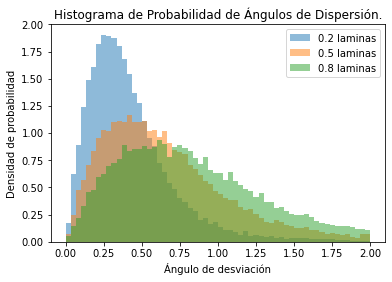

In [3]:
# GRAFICA 1 : Histograma muy pocas láminas.

graficar_experimento = [0,1,2]
lista_max_ang        = []
for num_experimento in graficar_experimento:
    num_laminas = experimento_laminas[num_experimento]
    n,bins,_ = plt.hist(angulos[num_experimento],
                        bins=60,
                        density=True,
                        range=(0,2),
                        alpha=0.5,
                        label=f"{num_laminas} laminas")
    index   = np.argmax(n)
    max_ang = bins[index]
    lista_max_ang.append(max_ang)

plt.title("Histograma de Probabilidad de Ángulos de Dispersión.")
plt.xlabel("Ángulo de desviación")
plt.ylabel("Densidad de probabilidad")
plt.legend()

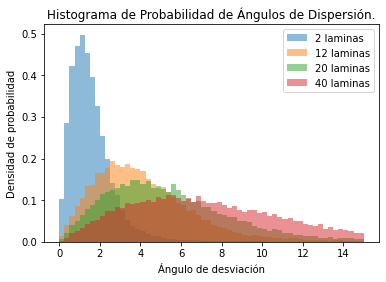

In [8]:
# GRAFICA 2 : Histograma muchas láminas.

graficar_experimento = [3,4,5,6]
for num_experimento in graficar_experimento:
    num_laminas = experimento_laminas[num_experimento]
    n,bins,_ = plt.hist(angulos[num_experimento],
                        bins=60,
                        density=True,
                        range=(0,15),
                        alpha=0.5,
                        label=f"{num_laminas} laminas")
    index   = np.argmax(n)
    max_ang = bins[index]
    lista_max_ang.append(max_ang)

plt.title("Histograma de Probabilidad de Ángulos de Dispersión.")
plt.xlabel("Ángulo de desviación")
plt.ylabel("Densidad de probabilidad")
plt.legend()

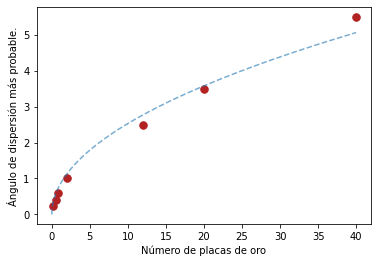

In [7]:
# GRAFICA 3 : GRAFICA ÁNGULOS MÁS PROBABLES.

plt.plot(experimento_laminas,lista_max_ang,".",c="firebrick",markersize=15)
plt.xlabel("Número de placas de oro")
plt.ylabel("Ángulo de dispersión más probable.")
X = np.arange(0,40,0.01)
Y = 0.8*np.sqrt(X)
plt.plot(X,Y,"--",alpha=0.6)